> _Exercises_: Structure of the the philosopher network 
> 
> Last time, we found the most connected philosophers (using degree centrality). Now let's dig in and try to understand more about the philosopher network using more advanced network features. If your network has more than one component, just work on the _giant connected component_ (GCC) in the exercises below (in a directed graph use the [_weakly_ connected component](https://networkx.github.io/documentation/networkx-1.9.1/reference/algorithms.component.html)).
> 
> * Not all of the measures we'll be considering below are defined for directed graphs, thus begin by creating an [undirected version](https://networkx.github.io/documentation/networkx-1.9.1/reference/generated/networkx.DiGraph.to_undirected.html) of the philosopher graph, that we can use whenever needed. Only use the undirected graph when explicitly stated in the exercise.

 

In [1]:
import pandas as pd
import os
import io

dataframe = pd.DataFrame(index=[],columns=["author","page"])


for folder,subs, files in os.walk(unicode("wiki", 'utf-8')):
    
    for filename in files:
        file_path = os.path.join(folder, filename)
        wiki_source = io.open(file_path,"r",encoding="utf-8")
        wiki = wiki_source.read()
        
        df = pd.DataFrame([[filename.replace(".txt",""),wiki]],columns=["author","page"])
        dataframe = dataframe.append(df,ignore_index=True)
        

In [2]:
import networkx as nx
import re

graph = nx.Graph()

# adding nodes
for index, row in dataframe.iterrows():
    graph.add_node(row["author"])
    
    # adding edges
pattern = r'\[\[(.*?)\]\]'


for index, row in dataframe.iterrows():
 
    
    matches = re.findall(pattern,row["page"])
    node = row["author"]
    for match in matches:
        out_node = match.split("|")[0]
        if out_node in dataframe["author"].tolist():
            graph.add_edge(node,out_node)
        

> * Find the 5 most central philosophers according to [betweenness centrality](https://networkx.github.io/documentation/networkx-1.9.1/reference/generated/networkx.algorithms.centrality.betweenness_centrality.html). What role do you imagine philosophers with high wikipedia graph betweenness centrality play in the history of philosophy?


In [3]:
betweenness_centrality = nx.betweenness_centrality(graph)

In [4]:
from operator import itemgetter
betweenness_centrality , betweenness_centrality_authors = zip(*sorted(zip(betweenness_centrality.values(),betweenness_centrality.keys())))

In [5]:
betweenness_centrality[-5:], betweenness_centrality_authors[-5:]

((0.04223819234922782,
  0.05605152905154457,
  0.06255812270651075,
  0.07638533841101654,
  0.0780484915496453),
 (u'David Hume',
  u'Plato',
  u'Bertrand Russell',
  u'Aristotle',
  u'Immanuel Kant'))

The philosophers with high betweenness centrality might be influential figures in creation of the different branches in philosophy. In this sense they might be laying some kind of foundation for the branches. Or many branches has evolved from their philosophies. 

> * Find the 5 most central philosophers according to [eigenvector centrality](https://networkx.github.io/documentation/networkx-1.9.1/reference/generated/networkx.algorithms.centrality.eigenvector_centrality.html). Calculate centrality corresponding to both in- and out-edges (see NetworkX documentation for details). 



In [6]:
eigenvector_centrality = nx.eigenvector_centrality(graph)

In [7]:
eigenvector , eigenvector_centrality_authors = zip(*sorted(zip(eigenvector_centrality.values(),eigenvector_centrality.keys())))

In [8]:
eigenvector[-5:],eigenvector_centrality_authors[-5:]

((0.18333335277245325,
  0.1879494896756925,
  0.1887606240162772,
  0.21327402722246955,
  0.2537072156616901),
 (u'Karl Marx',
  u'Friedrich Nietzsche',
  u'Plato',
  u'Aristotle',
  u'Immanuel Kant'))

In [9]:
degree_centrality = nx.degree_centrality(graph)
degree , degree_centrality_authors = zip(*sorted(zip(degree_centrality.values(),degree_centrality.keys())))

In [10]:
degree[-5:],degree_centrality_authors[-5:]

((0.09587727708533077,
  0.09875359539789069,
  0.10258868648130393,
  0.12655800575263662,
  0.137104506232023),
 (u'Bertrand Russell', u'Karl Marx', u'Plato', u'Aristotle', u'Immanuel Kant'))

> * How is eigenvector centrality difference from degree centrality?

The eigenvector centrality also takes into account how the neighbors of a node is connected. Because of the random walks in the graph. The degree centrality does not take into account how interconnected a node is but only how many connections it has.

> * Compare your results for eigenvector centrality to the results for betweenness centrality - does the difference make sense when you read the philosopher's wikipedia pages?


The eigenvector and betweenness centrality still has some philosophers in common. These are Immanuel Kant, Aristotle and Plato.



* [David Hume](https://en.wikipedia.org/wiki/David_Hume) and [Bertrand Russell](https://en.wikipedia.org/wiki/Bertrand_Russell) are on top 5 for Betweenness

* [Karl Marx](https://en.wikipedia.org/wiki/Karl_Marx) and [Friedrich Nietzsche](https://en.wikipedia.org/wiki/Friedrich_Nietzsche) are on the top 5 for eigenvector


Karl Marx and Friedrich Nietzsche might have been more influential in the history of philosopy compared to David Hume and Bertrand Russells that were more broadly interrested when looking at their main interests, but perhaps not as influencial for certain branches of philosophy

> * Is the _undirected version_ of the graph [assortative with respect do degree](https://networkx.github.io/documentation/networkx-1.9.1/reference/generated/networkx.algorithms.assortativity.degree_assortativity_coefficient.html#networkx.algorithms.assortativity.degree_assortativity_coefficient)? (e.g. do high-degree philosophers tend to link to other high-degree philosophers, and low-degree philosophers to other low-degree philosophers?). Provide an interpretation of your answer?

In [11]:
nx.degree_assortativity_coefficient(graph)

-0.072119209662794656

The graph does not appear to be assortative with respect to degree. 

My interpretation would be that high degree philosophers can be seen as the base a type of philosophy. Therefore low degree philosophers would link to these philosophers as they might have been the first in their branch.

This could indicate that hubs(most influencial philosophers) are not referencing eachother. 

> _Exercises_: Age and structure in the philosopher network
> 
> Age of the philosophers plays a large role. Socrates/Plato and Aristotle are massive influences on philosophy in millennia subsequent to their birth. Now, let us explore how the birth-year of the philosophers plays a role in shaping the network. We've created a file (`.json` format) which provides the birth year for most of the philosophers. Get it [**here**](https://dl.dropboxusercontent.com/u/153071/02805/philosopher_birth_year.json). In the following, you may use that to get the birth-year for the philosopher. _Note_: It's possible that the list of names in the list of birth-years is not identical to the set of nodes in your network; thus, for the exercises including age, simply work on the [subgraph](https://networkx.github.io/documentation/networkx-1.9.1/reference/generated/networkx.Graph.subgraph.html) of nodes for which you have age-info.
> 
> * Create a histogram of the number of philosophers born in every century, starting 500 BC. Describe the plot. Does philosophy seem to have developed at a steady pace - or in a more bursty manner? Are we living in a golden age of philosophy right now? (Use the data & common sense to present an argument for your answer).
 

In [12]:
import json
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline


with open('philosopher_birth_year.json') as data_file:    
    data = json.load(data_file)


In [13]:
def create_histogram_from_graph(edges):
    
    min_value = 500
    max_value = 2000

    bin_vector = [i for i in range(min_value,max_value,100) ]
    print(bin_vector)
    hist, bin_edges = np.histogram(edges, bins = bin_vector)
    
    return hist
    
def create_bar_from_hist(hist,values):
 
    
    min_value = 500
    max_value = np.max(values)

    bin_vector = [i for i in range(min_value,max_value,100) ]
    plt.bar(bin_vector[:-1],hist, width=50)
    
    

In [14]:
hist = create_histogram_from_graph(data.values())

[500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900]


(array([   6.,    6.,    5.,    9.,    9.,   27.,   33.,   62.,   39.,
          40.,   65.,  116.,  166.,  478.,  342.]),
 array([ 500,  600,  700,  800,  900, 1000, 1100, 1200, 1300, 1400, 1500,
        1600, 1700, 1800, 1900, 2000]),
 <a list of 15 Patch objects>)

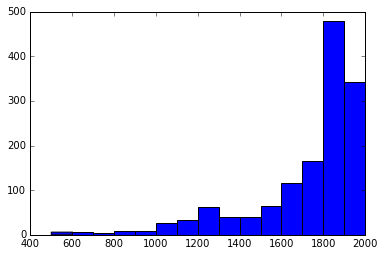

In [15]:
bin_vector = [i for i in range(500,2100,100) ]
plt.hist(data.values(),bins=bin_vector)


> It does seem like there was a huge spike in the 1900 century compared to the 1800 century. And from that point there was a decline in the number of philosophers. I there was an golden age given by the number of philosophers it would have been the 1900 century.

> * Is the _undirected version_ of the graph [assortative with respect to age](https://networkx.github.io/documentation/networkx-1.9.1/reference/generated/networkx.algorithms.assortativity.attribute_assortativity_coefficient.html#networkx.algorithms.assortativity.attribute_assortativity_coefficient)? Once again, provide an interpretation of your answer.


In [17]:
for key in data:
    try:
        graph.node[key]["age"] = data[key]
    except KeyError as e:
        print e

u'Gaius Marius Victorinus'
u'Paul Carus'
u'Carlo Cattaneo'
u'Nicholas of Cusa'
u'Paul Ramsey (ethicist)'
u'W. V. O. Quine'
u'Sergei Iosifovich Hessen'
u'James Hopwood Jeans'
u'Jakob Sigismund Beck'
u'Octave Hamelin'
u'Robert Desgabets'
u'Joseph Mar\xe9chal'
u'William of Shyreswood'
u'Linus Pauling'
u'Richard B. Brandt'
u'Henry Suso'
u'Matthew Arnold'
u'Nishitani Keiji'
u'Juli\xe1n Mar\xedas'
u'Akos Pauler'
u'Benjamin Constant'
u'Arthur Edward Murphy'
u'Lucien L\xe9vy-Bruhl'
u'Georges Florovsky'
u'Carl Jung'
u'Johann Heinrich Pestalozzi'
u'Aron Gurwitsch'
u'Claude Henri de Rouvroy, Comte de Saint-Simon'
u'John Selden'
u'Sarvepalli Radhakrishnan'
u'Shen Dao'
u'Germain Grisez'
u'Joseph Rovan'
u'Petar II Petrovi\u0107-Njego\u0161'
u'Robert Holcot'
u'John of La Rochelle'
u'Ibn Kammuna'
u'Alejandro Deustua'
u'Al-Farabi'
u'Leonard Trelawny Hobhouse'
u'\xc9tienne Bonnot de Condillac'
u'Carl Heim'
u'Jean Baudrillard'
u'Radovan Richta'
u'Gorgias'
u'Shinran'
u'Vatsyayana'
u'Norman Robert Campbell

In [18]:
nx.attribute_assortativity_coefficient(graph,attribute="age")

0.019718110425695434

The graph does seem to be assortative with respect to age. This might be explained by philosophers of the same time period might be influencing eachother. 

> * A reasonable hypothesis is that old philosophers are more famous. Create a scatter-plot of age versus in-degree. Do you see a correlation between the two? Justify your answer (for example by calculating the correlation coefficient.)


In [19]:
import networkx as nx
import re

di_graph = nx.DiGraph()

# adding nodes
for index, row in dataframe.iterrows():
    di_graph.add_node(row["author"])
    
    # adding edges
pattern = r'\[\[(.*?)\]\]'


for index, row in dataframe.iterrows():
 
    
    matches = re.findall(pattern,row["page"])
    node = row["author"]
    for match in matches:
        out_node = match.split("|")[0]
        if out_node in dataframe["author"].tolist():
            di_graph.add_edge(node,out_node)
        

In [20]:
for key in data:
    try:
        di_graph.node[key]["age"] = data[key]
    except KeyError as e:
        pass
        #print e

In [21]:
degree_list = list()
age_list = list()
for key in data:
    try:
        in_degree = di_graph.in_degree(key)
        age = di_graph.node[key]["age"]
        
        degree_list.append(in_degree)
        age_list.append(age)
    except:
        pass

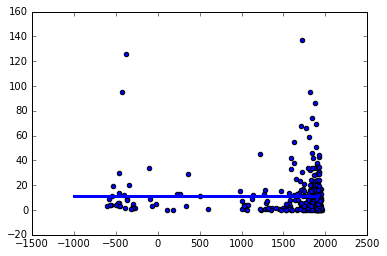

In [22]:
fig, ax = plt.subplots()

x = np.arange(-1000,2000,100)
y_mean = [np.mean(degree_list) for i in x]

ax.scatter(age_list,degree_list)
ax.plot(x,y_mean ,linewidth=3)

> * A reasonable hypothesis is that old philosophers are more famous. Create a scatter-plot of age versus in-degree. Do you see a correlation between the two? Justify your answer (for example by calculating the correlation coefficient.)

From the scatter plot it does not seem to be the case how ever there are two anomalies where the in degree is high for the old philosophers. And depending on the definition of old it would seem the philosophers in the 2000 century does not have as high a in degree. 


In [ ]:
# TODO The value might have changed!

In [23]:
correlation_coefficient = np.corrcoef(age_list,degree_list)
correlation_coefficient

array([[ 1.        , -0.05021746],
       [-0.05021746,  1.        ]])

The correlation coefficient is close to 0 which means that there is no linear relationship between the age and the indegree

### Part B: The branches of philosophy. Are they communities?

> _Exercises_: We will use the concept of modularity to explore how _community-like_ the six branches of philosophy are.
> 
> * Explain the concept of modularity in your own words.
> * Now we will calculate the modularity of the branches reported by the Wikipedia editors. But we need to do a bit of work to make this happen.

>    * This I will do later




> * Firstly, modularity does not work when the communities are overlapping. Thus, we need to do something about the philosophers that are part of multiple branches. We will handle it by creating a set of _six new branches_, where we take all of the philosophers that belong to more than one branch and assign them to the branch that they have the most connections to. The procedure is the following:
>   * Start with creating six new branches (e.g. represented as [`set`s](https://docs.python.org/2/library/sets.html) in Python) containing all of the philosopher that can be unambiguously assigned to a branch.
>   * Then, take the list of all nodes that are part of more than one branch. For each member _i_ of this list, find those of its neighbours that you just unambigously assigned to each branch. 
>   * Add _i_ to to the branch that it has most such connections to.


In [50]:
import os 

#regex = r'\[\[(.*?)\]\]'

import re
import io
import os

def apply_pattern_to_file(file_path,pattern):
    f = io.open(file_path,"r",encoding="utf-8")
    match = re.findall(pattern,f.read())
    f.close()
    return match

def create_philo_list():
    regex = r'\[\[(:\w*:)?(.+?)\|.*?\]\]|\[\[(.+?)\]\]'

    philo_list = list()
    branch_name_list = list()

    counter = 0
    for txt_file in os.listdir("philosophers/"):

        file_path = os.path.join("philosophers",txt_file)
        branch_name_list.append(txt_file.split(".")[0])
        print("="*10,file_path,"="*10)



    #     f = io.open(file_path,"r",encoding="utf-8")
    #     for line in f.readlines():
    #         print line

        matchs = apply_pattern_to_file(file_path,regex)
        temp_list = list()
        for match in matchs:
            #print(match)
            language = ""
            name = ""
            if match[0] is not u"":
                language = match[0]
            else:
                language = "en" 

            if match[1] is not u"":
                temp_list.append(match[1])
                name = match[1]
            else:
                temp_list.append(match[2])
                name = match[2]

            
        philo_list.append(temp_list)

        #print(len(matchs))
        counter += len(matchs)

    print "Total " + str(counter)
    return philo_list , branch_name_list



from collections import Counter
import operator

def create_times_accured_list(philo_branch_lists):
    
    total_philo_list = list()
    for philos in philo_list:
        for philo in philos:
            total_philo_list.append(philo)

    accurence_dict = Counter(total_philo_list)

    philo_times_accurence_list = list()

    for key, value in accurence_dict.iteritems():
        temp = [key,value]
        philo_times_accurence_list.append(temp)
        
    sorted_philo_times_accurence_list = sorted(philo_times_accurence_list, key=lambda x: x[1], reverse=True)
    sorted_philo_times_accurence_list 
        
    return sorted_philo_times_accurence_list


In [ ]:
philo_branch_lists , branch_name_list = create_philo_list()

sorted_philo_times_accurence_list = create_times_accured_list(philo_branch_lists)

In [129]:
def create_dict_with_set(philo_branch_lists,branch_name_list,sorted_philo_times_accurence_list):

    branch_dict_with_set_inside = dict()
    for branch_name in branch_name_list:
        branch_dict_with_set_inside[branch_name] = set()


    for philo in sorted_philo_times_accurence_list:
        if philo[1] == 1:
            # if == 1 then its node is alone in branch
            for branch,branch_name in zip(philo_branch_lists,branch_name_list):
                if philo[0] in branch:
                    branch_dict_with_set_inside[branch_name].add(philo[0])
                    #print(philo[0],philo[1],branch_name)
                    
    return branch_dict_with_set_inside


def create_philo_list_accuring_in_more_branches(sorted_philo_times_accurence_list):
    
    philo_list = list()
    
    for philo in sorted_philo_times_accurence_list:
        if philo[1] > 1:
            #print(philo) 
            philo_list.append(philo[0])
            
    return philo_list


def create_branch_counter_dict(branch_name_list):
    branch_counter_dict = dict()

    for branch_name in branch_name_list:
        branch_counter_dict[branch_name] = 0
    return branch_counter_dict

def adding_highly_connected_philo_to_set(di_graph,philo_in_more_brances_list,branch_name_list,branch_dict_with_set_inside):

    for philo in philo_in_more_brances_list:
        print("==========Philosopher=============")
        
        print(philo)
        branch_counter_dict = create_branch_counter_dict(branch_name_list)
        print("==========Neighbors=============")
        for neighbor in di_graph.neighbors(philo):
            for branch_key, value_set in branch_dict_with_set_inside.items():
                if neighbor in value_set:
                    branch_counter_dict[branch_key] += 1
                    print(branch_key)

                    print(neighbor)

        print(branch_counter_dict)


        # Add node to the set with most connectingimport operator

        key,value = max(branch_counter_dict.items(), key=operator.itemgetter(1))
        branch_dict_with_set_inside[key].add(philo)
        print(key,value)



In [130]:
# Create six branches

# Assign philosopher to branch that they have most connections to.

# Six sets for each branch were philosopher is only in that branch

branch_dict_with_set_inside = create_dict_with_set(philo_branch_lists=philo_branch_lists,
                                                   branch_name_list=branch_name_list, 
                                                   sorted_philo_times_accurence_list=sorted_philo_times_accurence_list)

# Make list with nodes that are in more branches 

philo_in_more_brances_list = create_philo_list_accuring_in_more_branches(sorted_philo_times_accurence_list)

# For each node find the neighbors that exists for each branch

adding_highly_connected_philo_to_set(di_graph,philo_in_more_brances_list,branch_name_list,branch_dict_with_set_inside)





==========Philosopher=============
Thomas Aquinas
==========Neighbors=============
aestheticians
Jacques Maritain
ethicists
Ambrose
ethicists
Alasdair MacIntyre
aestheticians
Umberto Eco
ethicists
G. E. M. Anscombe
ethicists
Philippa Foot
social and political philosophers
Averroes
logicians
Boethius
aestheticians
James Joyce
ethicists
Maimonides
{'social and political philosophers': 1, 'aestheticians': 3, 'logicians': 1, 'epistemologists': 0, 'metaphysicians': 0, 'ethicists': 5}
('ethicists', 5)
==========Philosopher=============
Aristotle
==========Neighbors=============
ethicists
Thomas Aquinas
ethicists
Andronicus of Rhodes
metaphysicians
Heraclitus
ethicists
W. D. Ross
ethicists
Xenocrates
social and political philosophers
Averroes
logicians
Boethius
logicians
Conimbricenses
metaphysicians
Galileo Galilei
ethicists
Alasdair MacIntyre
ethicists
Avicenna
social and political philosophers
Cicero
metaphysicians
Lucretius
ethicists
Aristoxenus
metaphysicians
Parmenides
logicians
Theophr

> * Now that we have a new set of non-overlapping branches, we can calculate the modularity, described in the _Network Science_ book, section 9.4). Use **equation 9.12** in the book to calculate the modularity _M_ of the branches-partitioning. 
> * Comment on the value of _M_. Are the branches good communities? (We will explore this question in depth below.)
> 
       

In [ ]:
# Calculating M